One of the challenges in applying clustering algorithms is that it is very hard to assess how well an algorithm worked, and to compare outcomes between different algorithms

Let's start with some simple metrics

### Evaluating clustering with known ground truth

There are metrics that can be used to assess the outcome of a clustering algorithm when the ground truth is known. These metrics are called external metrics, and they include:
- Adjusted Rand Index (ARI): measures the similarity between two clusterings
- Mutual Information based scores: measures the agreement between two clusterings
- Homogeneity, completeness and V-measure: measures the homogeneity, completeness and harmonic mean of homogeneity and completeness of the clustering
- Fowlkes-Mallows scores: measures the similarity between two clusterings
- Normalized Mutual Information: measures the agreement between two clusterings

We will compare the performance of KMeans, AgglomerativeClustering and DBSCAN using these metrics

In [12]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, v_measure_score, completeness_score, homogeneity_score, mutual_info_score
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.preprocessing import StandardScaler

In [9]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [10]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

KMeans - 0 - 0.5015977200103636 - 0
KMeans - 1 - 0.2796688201906593 - 0
KMeans - 2 - 0.40347681998033186 - 0
KMeans - 3 - 0.40373897180696466 - 0
KMeans - 4 - 0.4036078533253655 - 0
KMeans - 5 - 0.7496593231711579 - 0
KMeans - 6 - 0.4036078533253654 - 0
AgglomerativeClustering - 0 - 0.6065184066117172 - 1
AgglomerativeClustering - 1 - 0.4052941061361195 - 1
AgglomerativeClustering - 2 - 0.5847157970241055 - 1
AgglomerativeClustering - 3 - 0.6060489952862184 - 1
AgglomerativeClustering - 4 - 0.5951912982359803 - 1
AgglomerativeClustering - 5 - 0.807171248081108 - 1
AgglomerativeClustering - 6 - 0.5951912982359802 - 1
DBSCAN - 0 - 1.0 - 2
DBSCAN - 1 - 0.6931471805599445 - 2
DBSCAN - 2 - 1.0 - 2
DBSCAN - 3 - 1.0 - 2
DBSCAN - 4 - 1.0 - 2
DBSCAN - 5 - 1.0 - 2
DBSCAN - 6 - 1.0 - 2


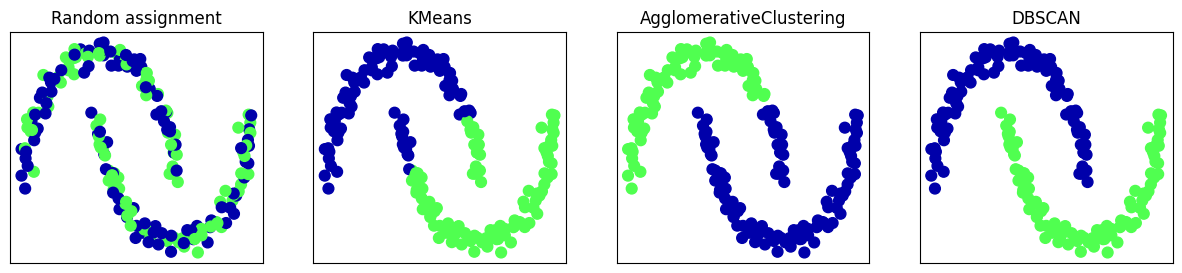

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment")

# Plot each clustering
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title(algorithm.__class__.__name__)

    scores = [
        adjusted_rand_score(y, clusters),
        mutual_info_score(y, clusters),
        homogeneity_score(y, clusters),
        completeness_score(y, clusters),
        v_measure_score(y, clusters),
        fowlkes_mallows_score(y, clusters),
        normalized_mutual_info_score(y, clusters)
    ]
    
    dct = {"KMeans": 0, "AgglomerativeClustering": 1, "DBSCAN": 2}
    
    for i, score in enumerate(scores):
        print(f"{algorithm.__class__.__name__} - {i} - {score}"
              f" - {dct[algorithm.__class__.__name__]}")
    
plt.show()

### Evaluating clustering without known ground truth

When the ground truth is not known, we can use internal metrics to assess the outcome of a clustering algorithm. These metrics include:
- Silhouette Coefficient: measures how similar an object is to its own cluster compared to other clusters
- Calinski-Harabasz Index: measures the ratio of between-cluster distance to within-cluster distance
- Davies-Bouldin Index: measures the average similarity between each cluster and its most similar one

Here is an example of how to use these metrics to compare the performance of KMeans, AgglomerativeClustering and DBSCAN

In [28]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [29]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [30]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

KMeans - 0 - 0.49304627727701233 - 0
KMeans - 1 - 278.43954337455546 - 0
KMeans - 2 - 0.8062106981225065 - 0
AgglomerativeClustering - 0 - 0.4572323945292666 - 1
AgglomerativeClustering - 1 - 229.00153503818632 - 1
AgglomerativeClustering - 2 - 0.8407238391521795 - 1
DBSCAN - 0 - 0.382386022679393 - 2
DBSCAN - 1 - 170.99237521476672 - 2
DBSCAN - 2 - 1.025851367934007 - 2


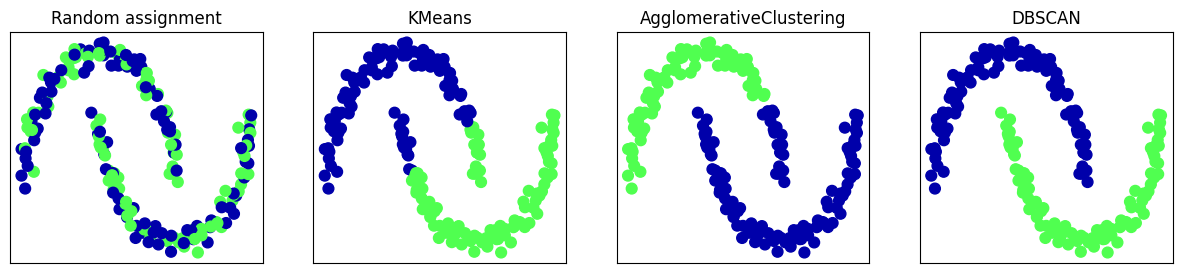

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment")

# Plot each clustering
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title(algorithm.__class__.__name__)

    scores = [
        silhouette_score(X_scaled, clusters),
        calinski_harabasz_score(X_scaled, clusters),
        davies_bouldin_score(X_scaled, clusters)
    ]
    
    dct = {"KMeans": 0, "AgglomerativeClustering": 1, "DBSCAN": 2}
    
    for i, score in enumerate(scores):
        print(f"{algorithm.__class__.__name__} - {i} - {score}"
              f" - {dct[algorithm.__class__.__name__]}")
    
plt.show()

For more information of all these metrics, please refer to the [sklearn documentation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)